# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


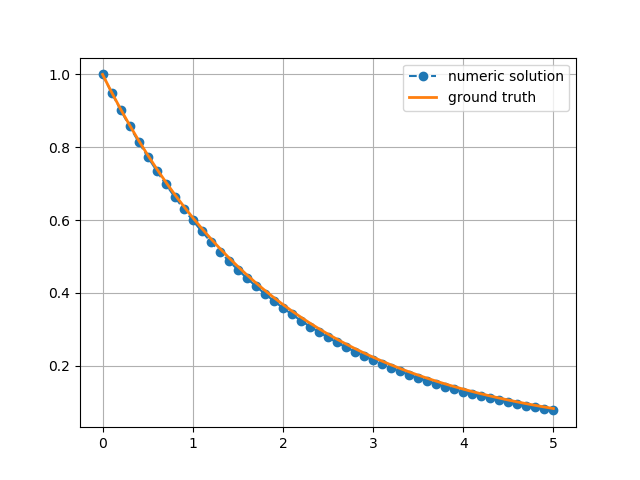

In [10]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

Пронаблюдаем эволюцию решений, постепенно увеличивая $\lambda$.
То есть будем относительно медленно приближаться к случаю, когда $| \lambda | \tau$ ~ 1

<IPython.core.display.Javascript object>


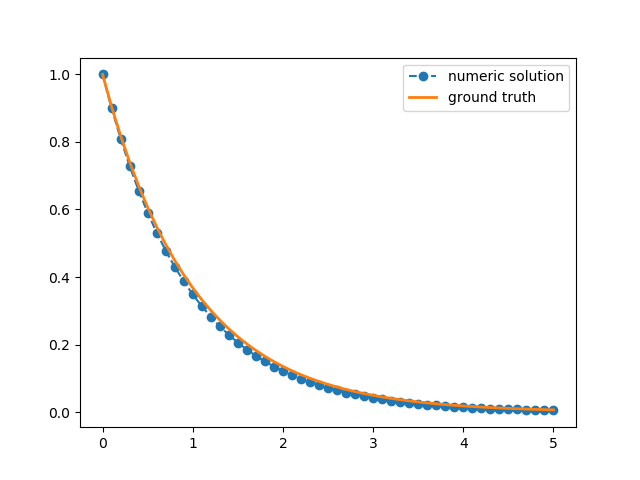

<IPython.core.display.Javascript object>


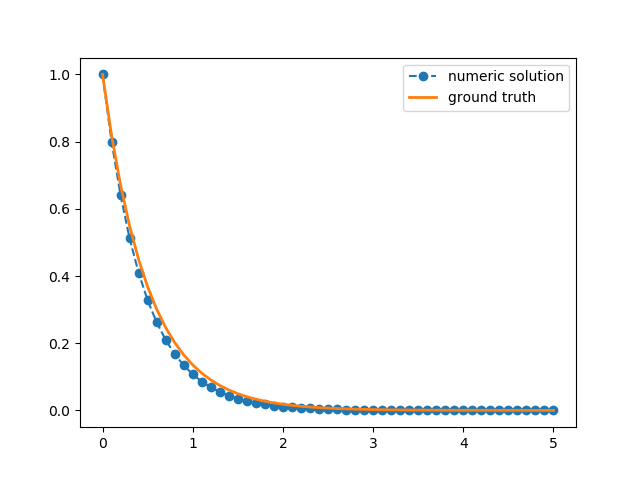

<IPython.core.display.Javascript object>


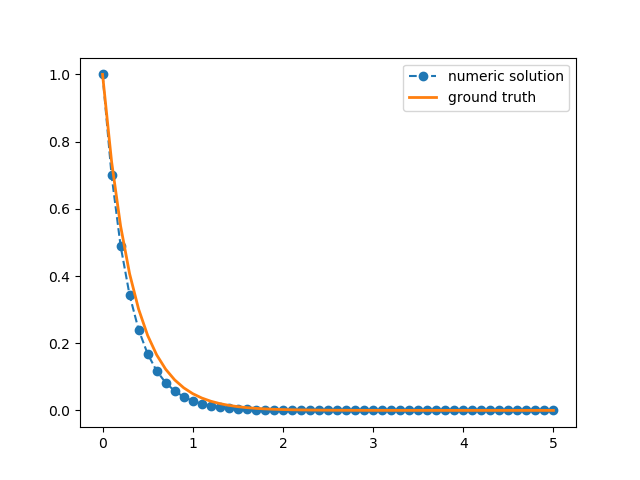

<IPython.core.display.Javascript object>


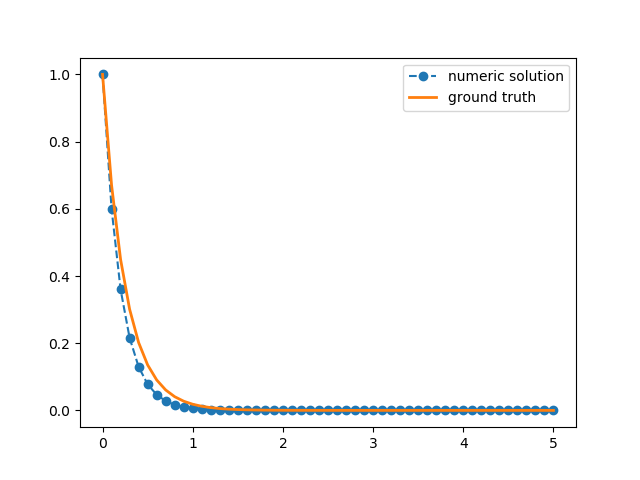

<IPython.core.display.Javascript object>


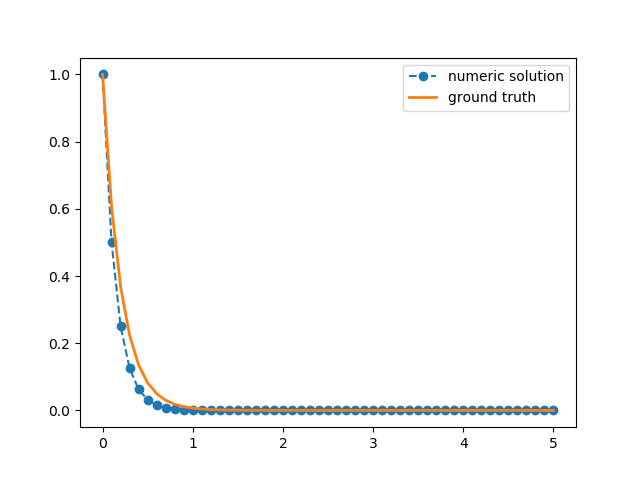

<IPython.core.display.Javascript object>


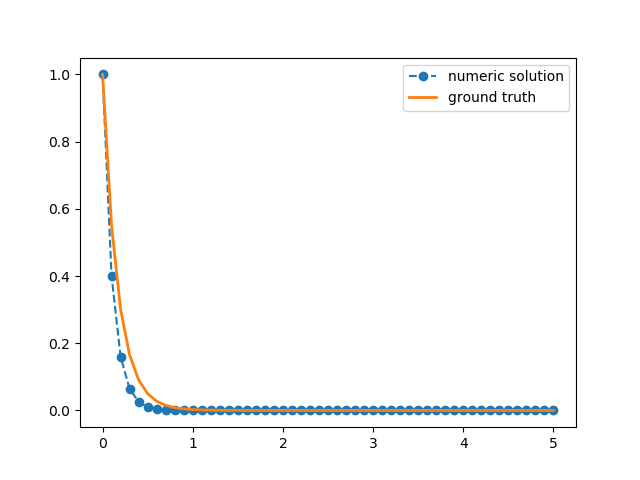

<IPython.core.display.Javascript object>


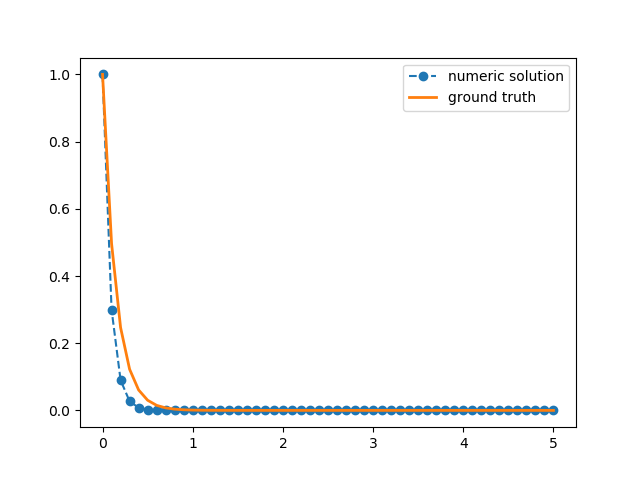

<IPython.core.display.Javascript object>


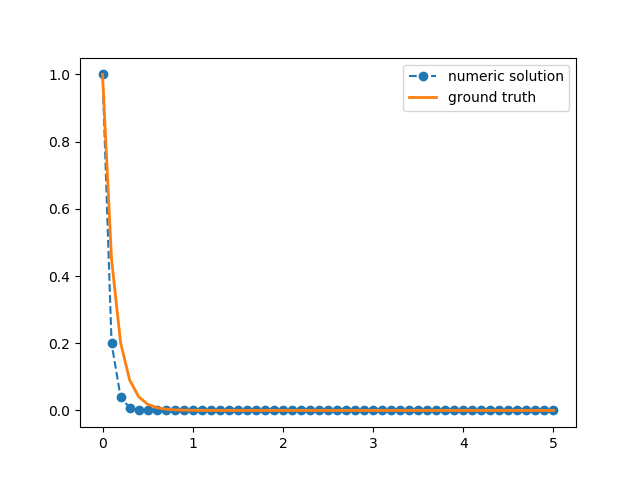

<IPython.core.display.Javascript object>


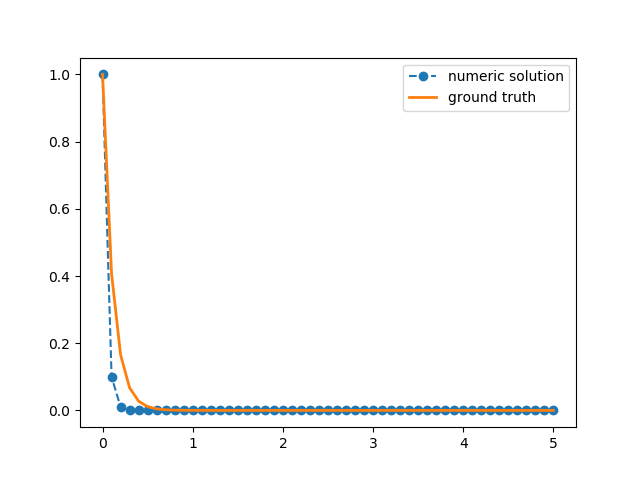

In [24]:
for i in range(1,10):   
        lam = -i
        tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
        plt.figure()
        plt.plot(tt, y, 'o--', label='numeric solution')
        plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
        plt.legend(loc='best')
        plt.show()
    

Видим, что даже если $| \lambda | \tau$ < 1, то все ранво решения начинают отклоняться.

Чтобы избежать плохих решений, то есть совсем неточных. Можно, например, параметр $\tau$ уменьшить. Сейчас мы уменьшим в 10 раз, и получим, что все более менее нормально будет работать.

<IPython.core.display.Javascript object>


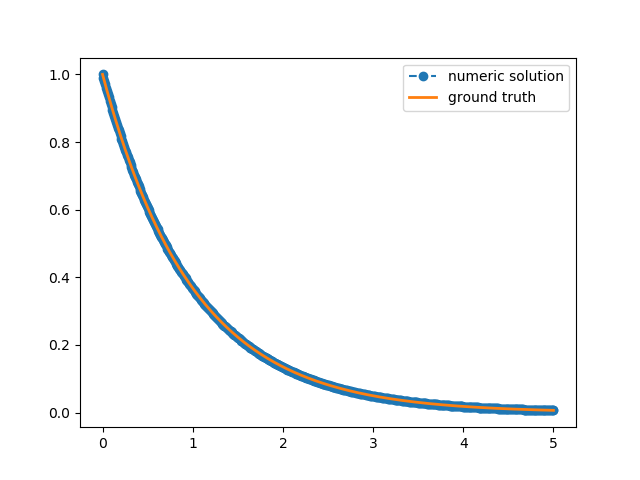

<IPython.core.display.Javascript object>


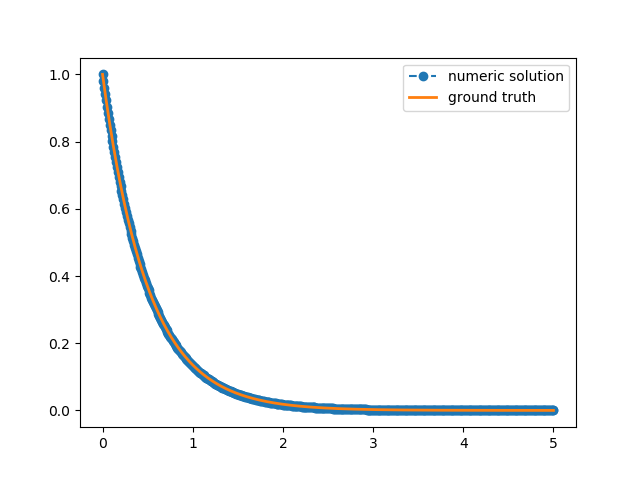

<IPython.core.display.Javascript object>


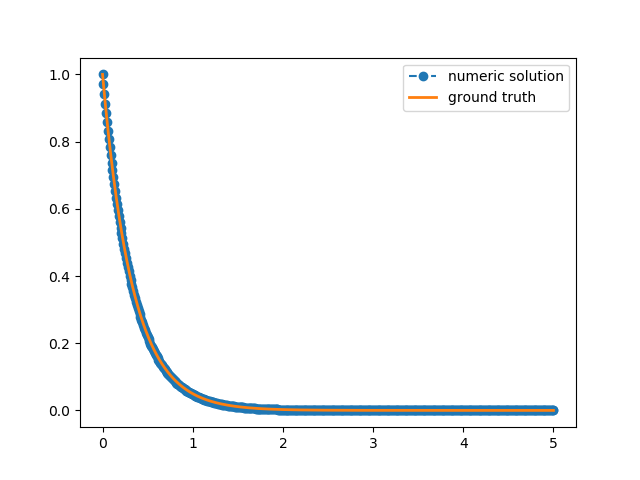

<IPython.core.display.Javascript object>


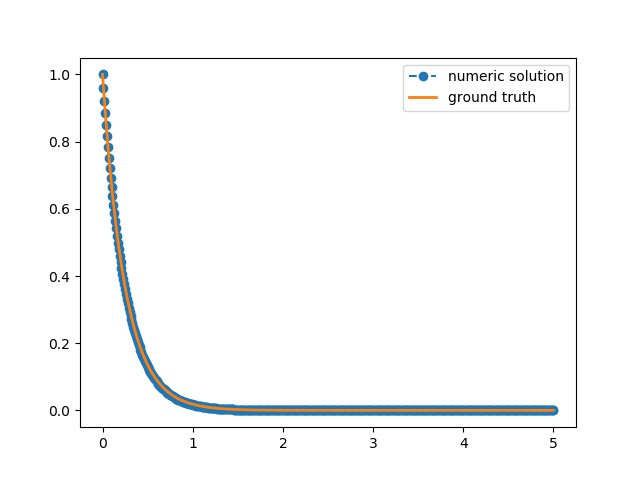

<IPython.core.display.Javascript object>


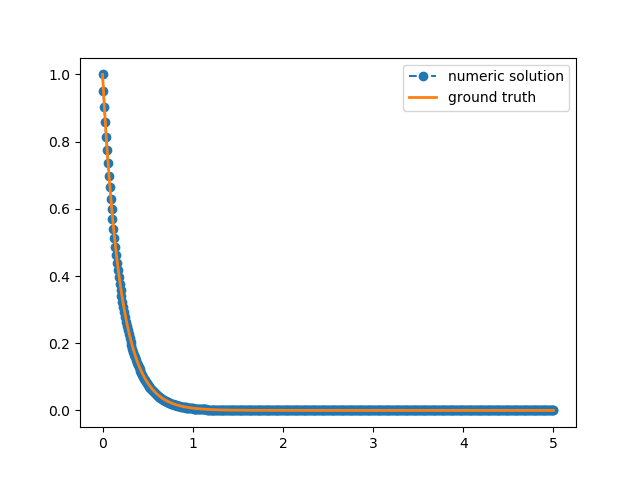

<IPython.core.display.Javascript object>


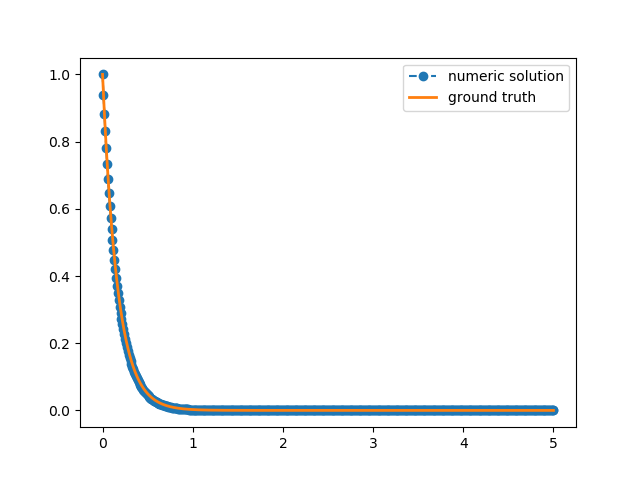

<IPython.core.display.Javascript object>


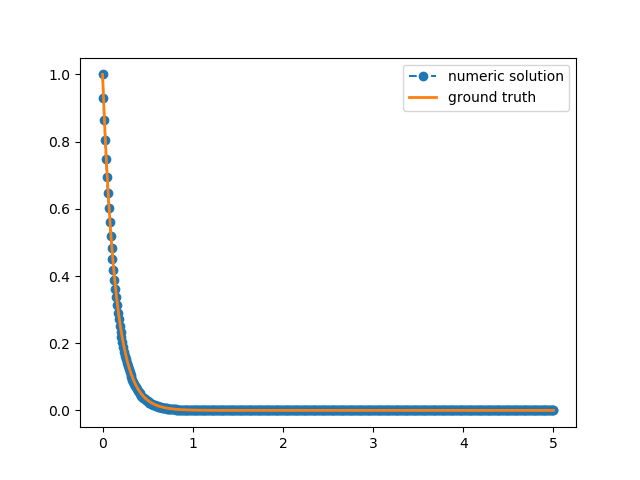

<IPython.core.display.Javascript object>


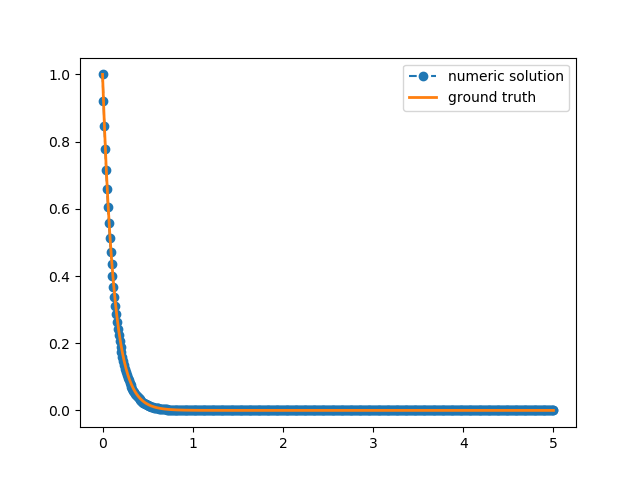

<IPython.core.display.Javascript object>


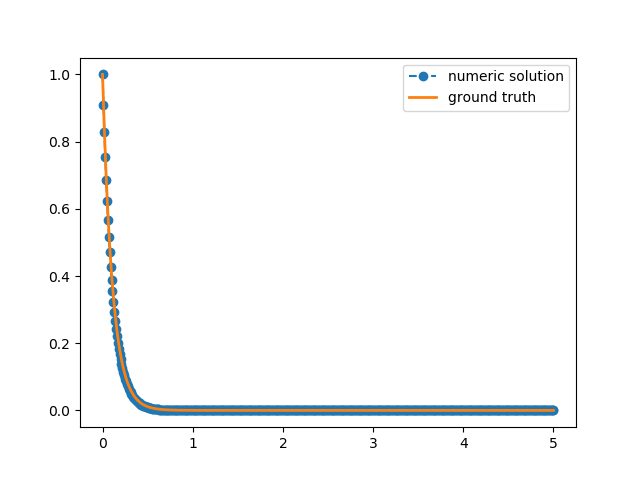

In [25]:
for i in range(1,10):   
        lam = -i
        tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.01)
        plt.figure()
        plt.plot(tt, y, 'o--', label='numeric solution')
        plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
        plt.legend(loc='best')
        plt.show()

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

Реализуем более точный мтеод. Тут отличие будет только в том, что в этом методе мы по-другому находим $y_{n+1}$ :

$ y_{n+1} = \dfrac{ y_n}{1-\lambda \tau} $

In [26]:
def non_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/ (1 - lam *dt)
    return tt, y

И теперь также прогоним тот тест, который мы делали раньше, постепенно увеличивая $|\lambda |$ и приближая значение $|\lambda| \tau$ к единице.

<IPython.core.display.Javascript object>


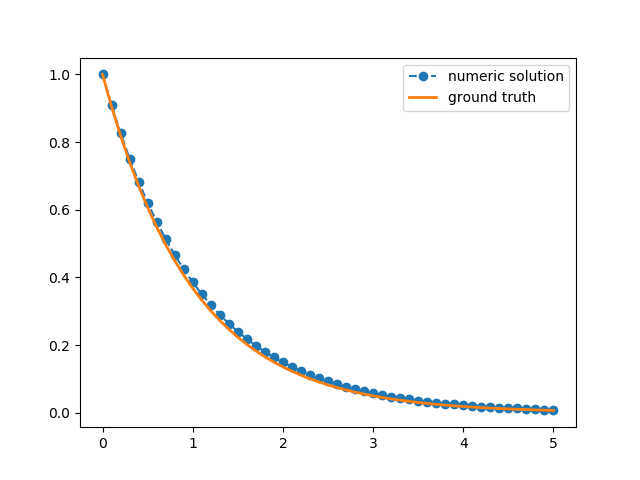

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


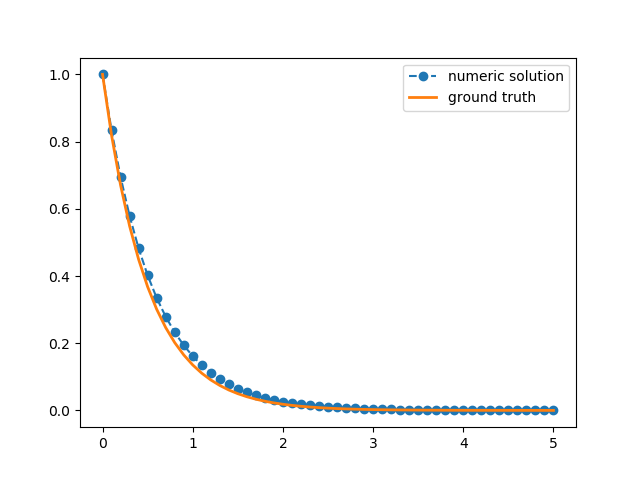

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


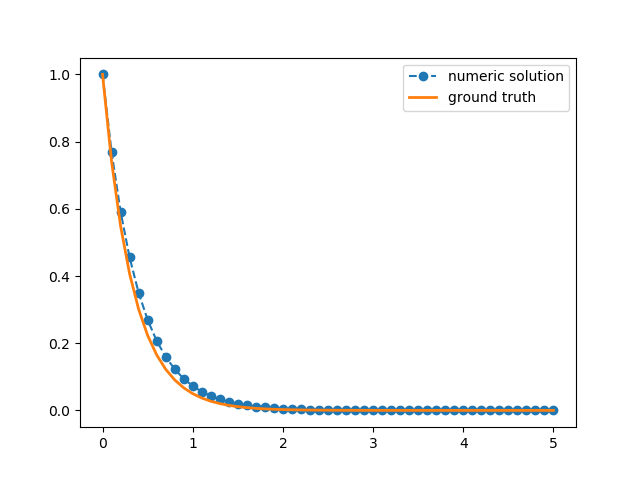

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


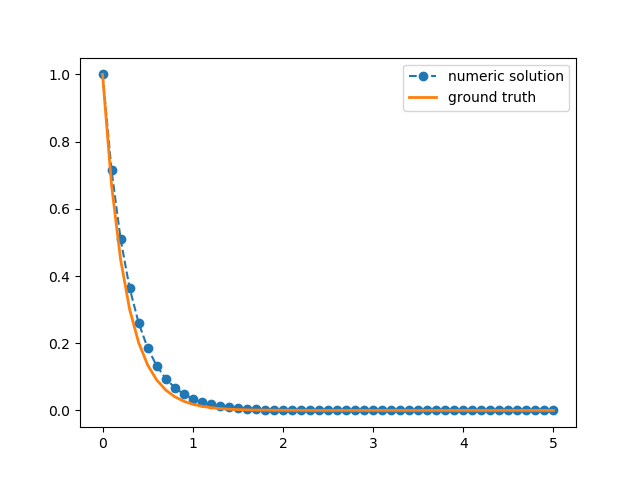

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


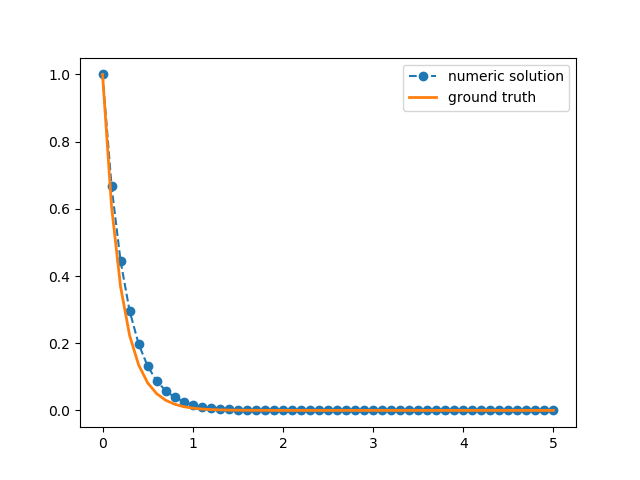

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


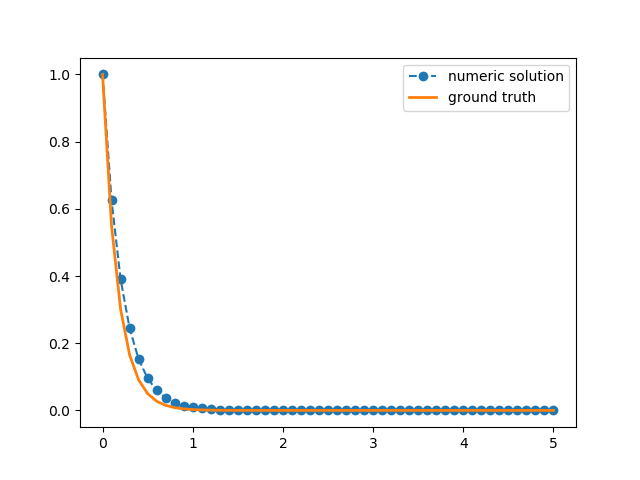

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


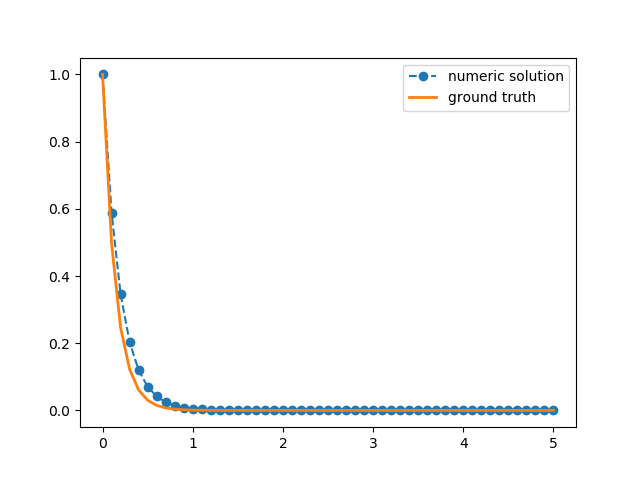

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


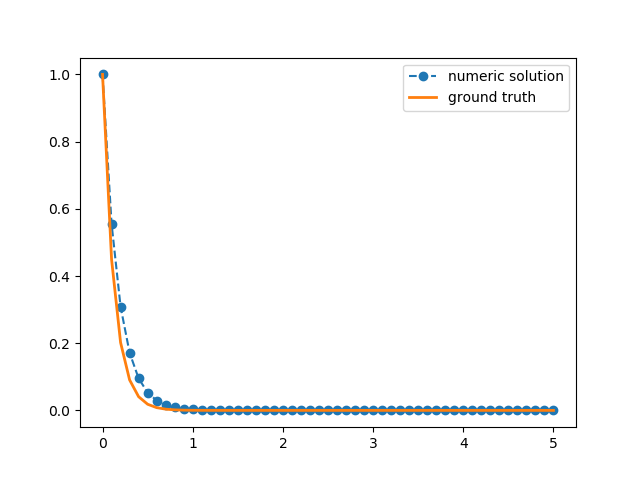

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


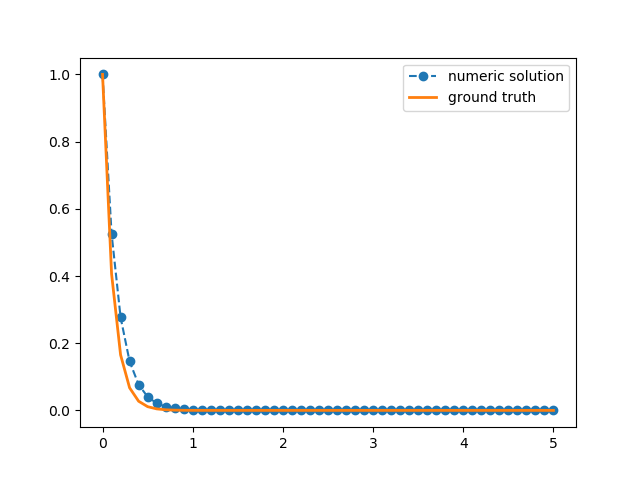

In [27]:
for i in range(1,10):   
        lam = -i
        tt, y = non_solve(lam, u0=1.0, T=5, dt=0.1)
        plt.figure()
        plt.plot(tt, y, 'o--', label='numeric solution')
        plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
        plt.legend(loc='best')
        plt.show()

Сейчас мы видим, что все равно решения отличаются от теоретического, но уже не так сильно. 
И если мы уменьшим $\tau$ , как в прошлом пункте, чтобы получить более менее ответ, то тут он также сработает. Давайте убедимся в этом

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


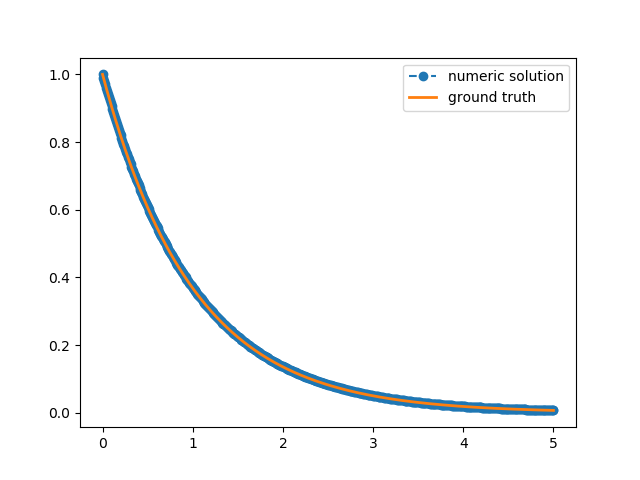

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


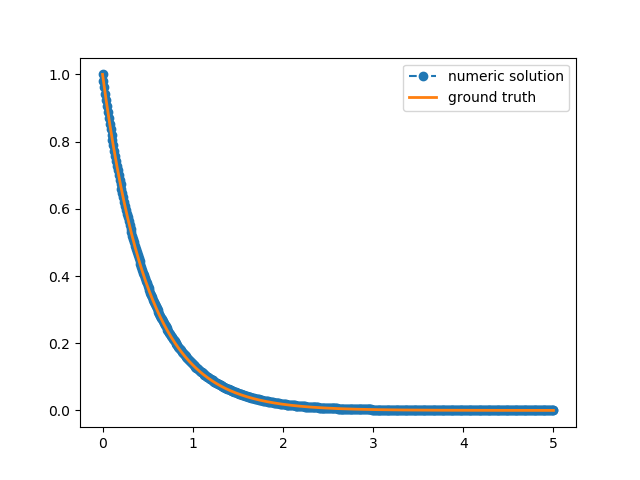

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


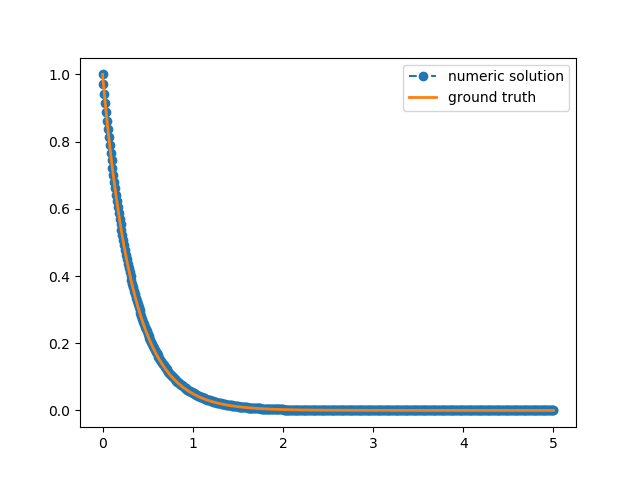

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


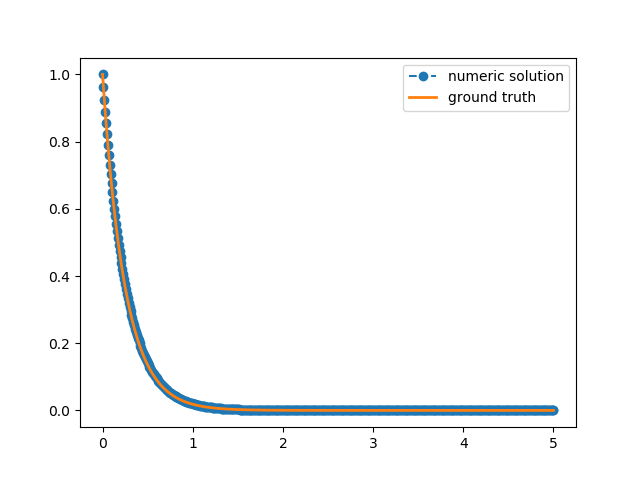

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


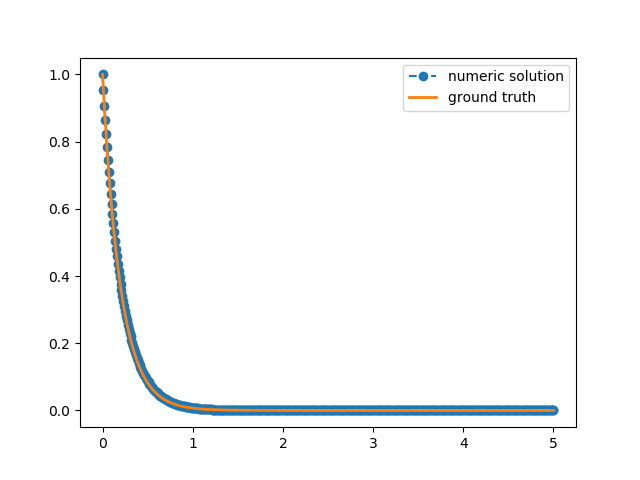

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


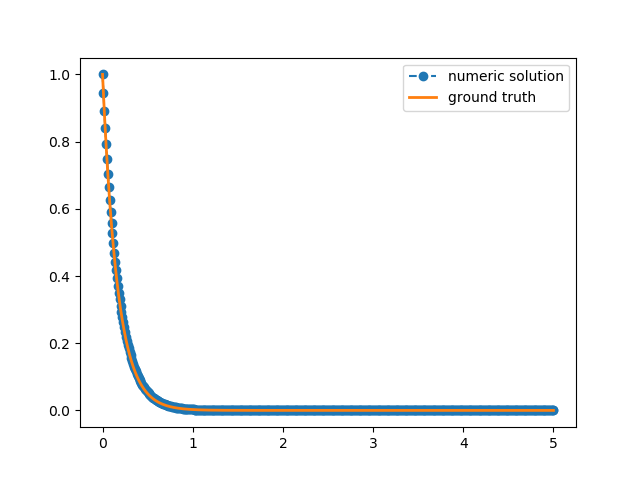

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


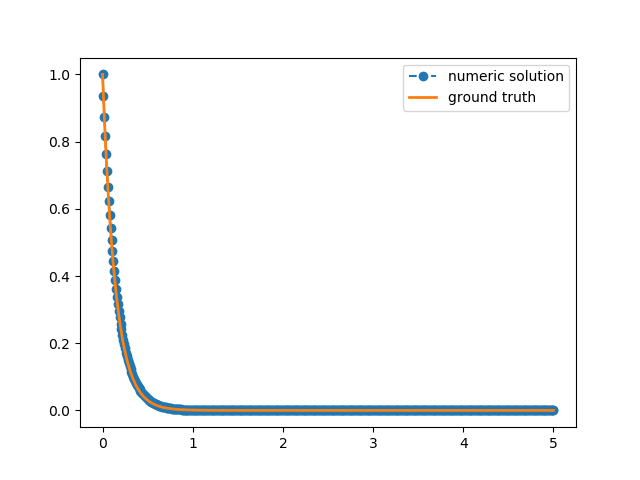

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


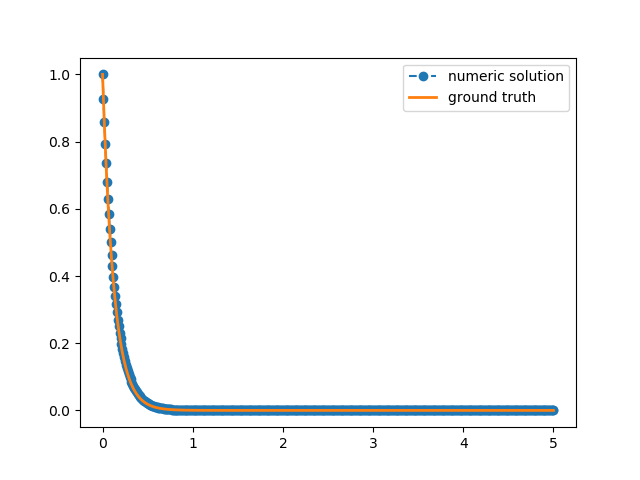

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


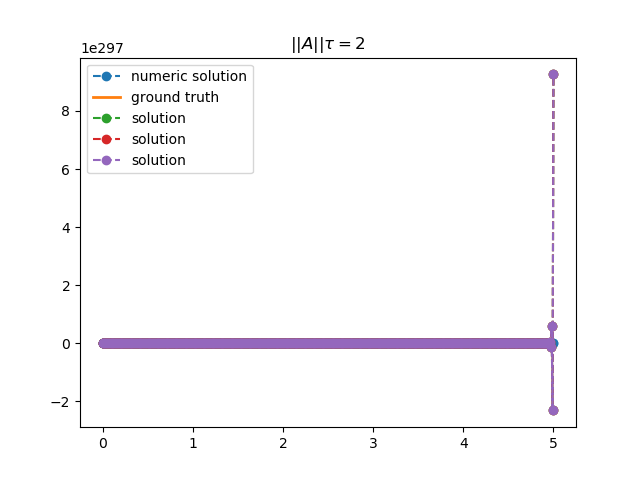

In [28]:
for i in range(1,10):   
        lam = -i
        tt, y = non_solve(lam, u0=1.0, T=5, dt=0.01)
        plt.figure()
        plt.plot(tt, y, 'o--', label='numeric solution')
        plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
        plt.legend(loc='best')
        plt.show()

Убедились, что тут оно тоже будет хорошо сходиться к теоретическому и правильному решению. Как видим, тут(в принципе в обоих методах) очень много зависит от порядка $| \lambda | \tau$. Если это произведение порядка 1, то решения будут различаться, причем это различие можно будет увидеть простым глазом прямо из графика, а если порядка $10^{-1}$, то решения уже будут трудно различимы от истинного.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

$$
\begin{cases}
 \dfrac{du_1}{dt} = A_{11}u_{1} + A_{12}u_{2} \\
 \dfrac{du_2}{dt} = A_{21}u_{1} + A_{22}u_{2}
 \end{cases}
 \Longrightarrow
\begin{cases}
 \dfrac{u_{n+1}-u_n}{dt} = A_{11}u_{n} + A_{12}u_k \\
 \dfrac{u_{k+1}-u_k}{dt} = A_{21}u_k + A_{22}u_k
 \end{cases}
 \Longrightarrow
$$

$$
\begin{cases}
 u_{n+1} = (A_{11}u_n + A_{12}u_k)\cdot dt + u_n \\
 u_{k+1} = (A_{21}u_n + A_{22}u_k) \cdot dt  + u_k
 \end{cases}
 \Longrightarrow
 \boxed{\vec{u}_{n+1} = \left(I + A \cdot dt\right) \cdot \vec{u_n}}
$$

Получили способ получения следующего вектора из предыдущего.

In [130]:
def euler_solve_dim(A, u0, T, dt): #заменим наш одномерный код на многомерный
                                   #для этого надо просто добавить срезы и все
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((u0.shape[0], num_steps+1))
    y[:,0] = u0
    for k in range(num_steps):
        y[:,k+1] = y[:,k] + dt*A@y[:,k]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [131]:
u0 = np.array([1, 0])
A = np.array([[-10, 10], [32, -499]])
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

Получили таки собственные значения этой матрицы. И видим, что $\lambda_1 <<\lambda_2$. И тогда нам надо настраивать шаг по $\lambda_2$. К сожалению, шаг $\tau = 0.01$ не подходит, так как второе решение будет очень быстро затухать, и можно сказать, что мы это затухание не увидим просто.

Построим эти графики для случая $\tau = 0.01$

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


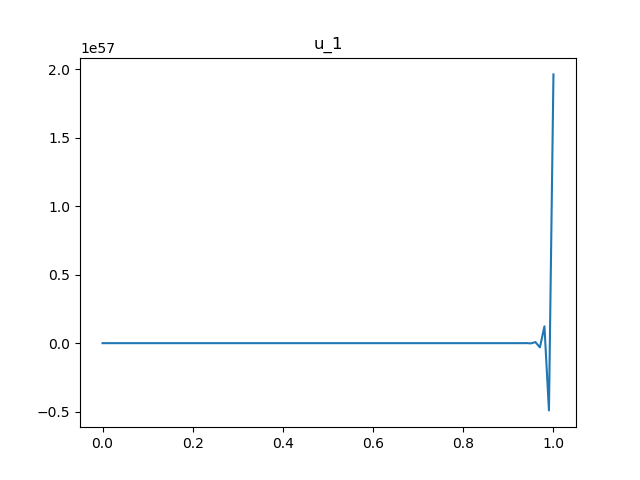

In [132]:
t, u = euler_solve_dim(A, u0, T = 1, dt=0.01)
plt.figure()
plt.plot(t,u[0])
plt.title(r'u_1')  
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


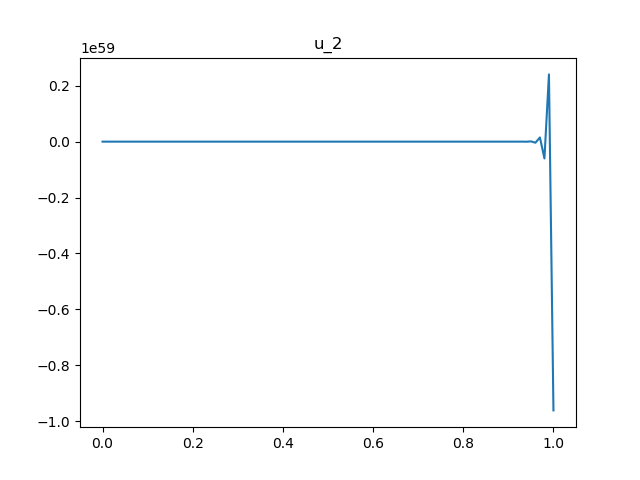

In [133]:
plt.figure()
plt.plot(t,u[1])
plt.title(r'u_2')  
plt.show()

Для отслежки того, какой шаг надо брать, мне кажется, что логично как-то было бы смотреть на норму матрицы А. Это кажется очень логичным. И тогда если $ ||A|| dt$ ~ 1, то будет наблюдаться расходимость, проводя аналогии с одномерным случаем.

In [134]:
np.linalg.norm(A)

500.22494939776846

Действительно, $||A|| \tau$ ~ 500*0.01 ~ 5. То есть получается та же логика, что и для одномерного. То есть из-за такого порядка их произведения происходит такая ерунда. А вот если шаг уменьшить, то тогда должно все стать намного лучше. Давайте проверим

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


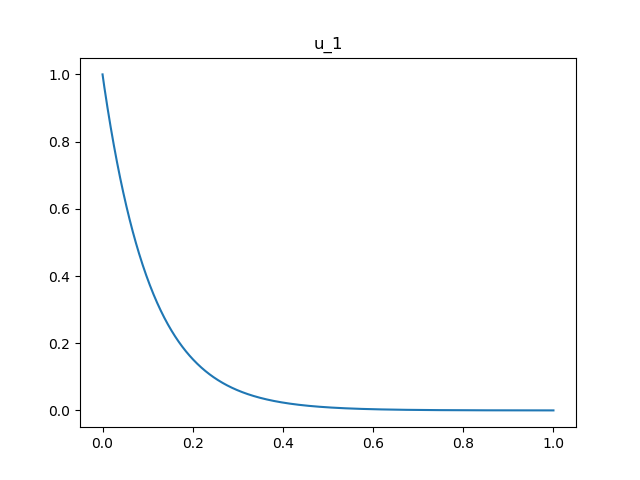

In [135]:
t, u = euler_solve_dim(A, u0, T = 1, dt=0.001)
plt.figure()
plt.plot(t,u[0])
plt.title(r'u_1')  
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


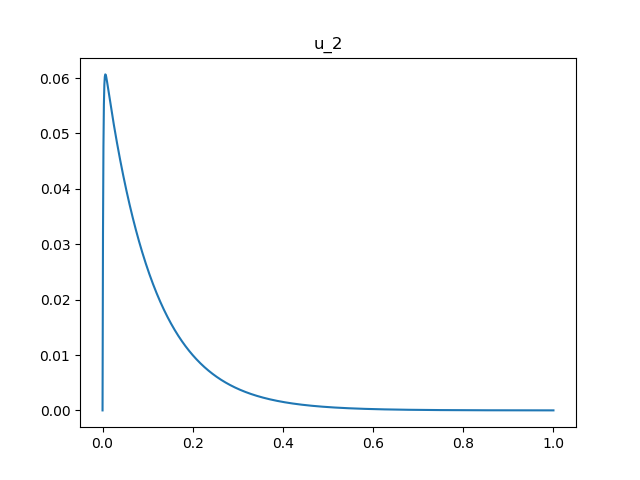

In [136]:
plt.figure()
plt.plot(t,u[1])
plt.title(r'u_2')  
plt.show()

Как видим, действительно, все стало намного лучше описываться. А тут случай, когда $ ||A|| \tau $ уже не порядка 1, а меньше.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

Можно провести тут те же самые манипуляции, что и для явного метода, который я сделал выше. Но чтобы не тратить время можно просто сказать, что результат будет аналогичный тому, что было в одномерии.
P.S. если понадобится, то могу написать сюда.(это дело 3 минут)
И тогда получаем такое выражение для нахождение n+1 вектора:

$ \boxed{(I - A \cdot dt)\vec{u}_{n+1} = \vec{u}_n}$

In [137]:
def non_solve_dim(A, u0, T, dt): #заменим в нашем коде, который находился с самого начала на многомерный
                                   #для этого надо просто добавить срезы и все
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((u0.shape[0], num_steps+1))
    y[:,0] = u0
    B = np.eye(u0.shape[0]) - A*dt
    for k in range(num_steps):
        y[:,k+1] = np.linalg.solve(B, y[:, k])
    return tt, y

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


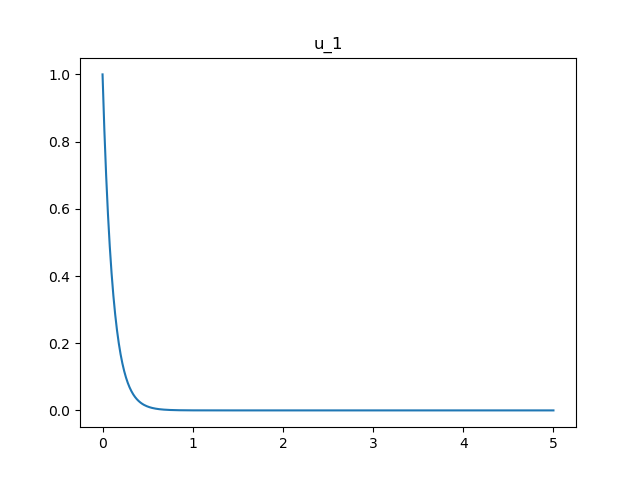

In [139]:
t, u = non_solve_dim(A, u0, 5, 0.01)

plt.figure()
plt.plot(t, u[0])
plt.title(r'u_1')  
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


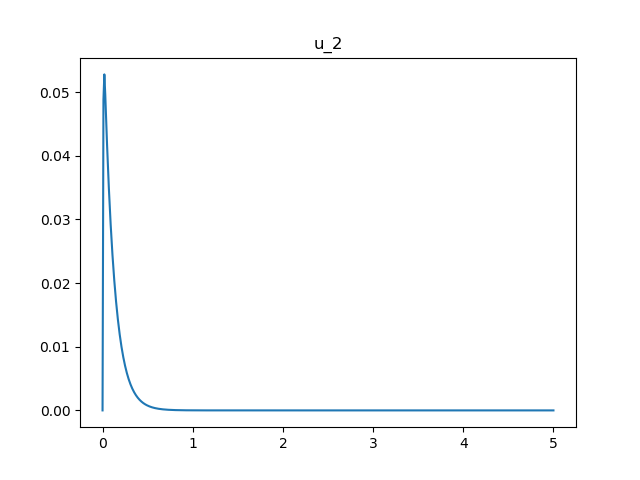

In [140]:
plt.figure()
plt.plot(t, u[1])
plt.title(r'u_2')  
plt.show()

А в этом методе даже для $\tau = 0.01$ все нормально описывается. Скажем так, видим на практике, что этот метод работает лучше.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

Честно, не очень понял, что именно от меня надо тут.
Напишу сюда просто матрицу, которая позволяет свести ДУ 2-ого порядка к ДУ 1-ого порядка

$$
A = \begin{bmatrix} 0 & -\omega^2 \\ 1 & 0  \end{bmatrix}
$$
\\

$$
 \begin{cases}
  \vec{x} = (P,u) \\
   P = \dfrac{du}{dt}
 \end{cases}
$$
### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Скажу сразу, что насчет выбора $\omega$ скажу в конце.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


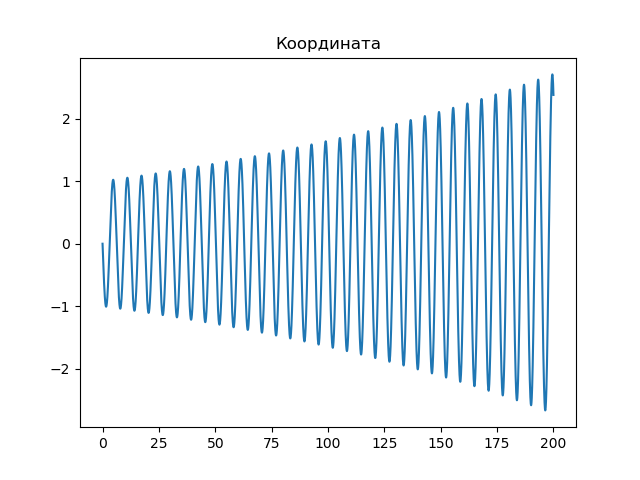

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


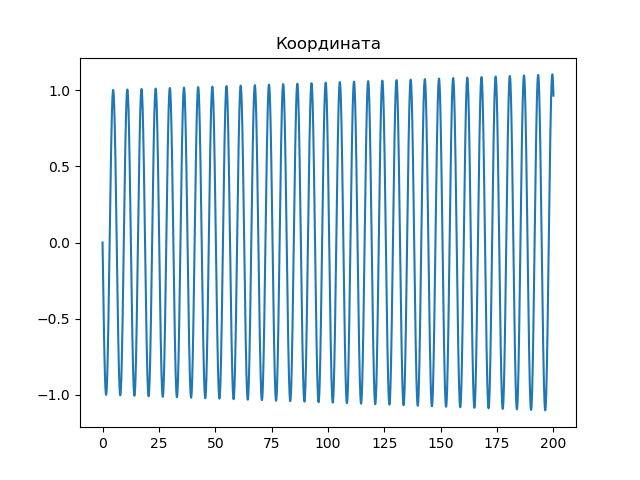

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


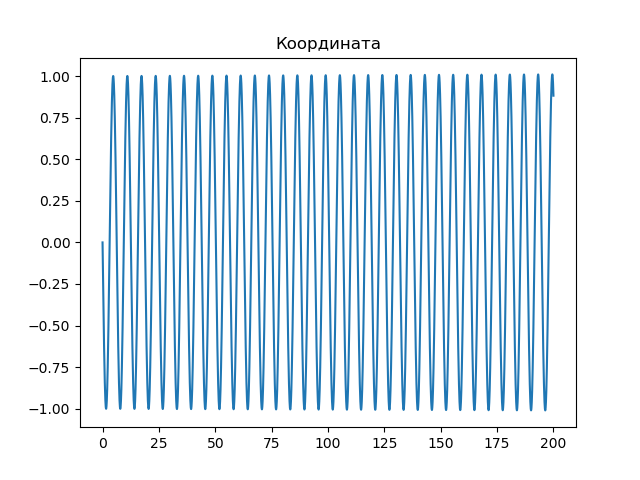

In [144]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0, 1])
tau = [0.01,0.001,0.0001]
for i in tau:
        t, u = euler_solve_dim(A, u0, T = 200, dt=i)
        plt.figure()
        plt.plot(t,u[0])
        plt.title(r'Координата')  
        plt.show()

Мы знаем из теории, что ответ будет периодическая функция. Поэтому глядя на эти графики, можно уже сразу сказать, что для первых двух случаев очевидно не будет выполняться закон сохранения энергии, а в третьем благодаря более менее маленькому шагу, который также должен зависеть от $\omega$, если мы хотим адекватные ответы, которые могли бы как-то сравниться с тем, что на самом деле происходит. И понятно, что в 3 случае ЗСЭ не будет выполняться из-за неточности в численных методах решения, но как мы видим, расходимость несильная при таком шаге. Тут я взял Т = 200, так как больше не могу из-за того, что слишком долго будет считать. Также понятно, что скорость будет таким же образом расходиться.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


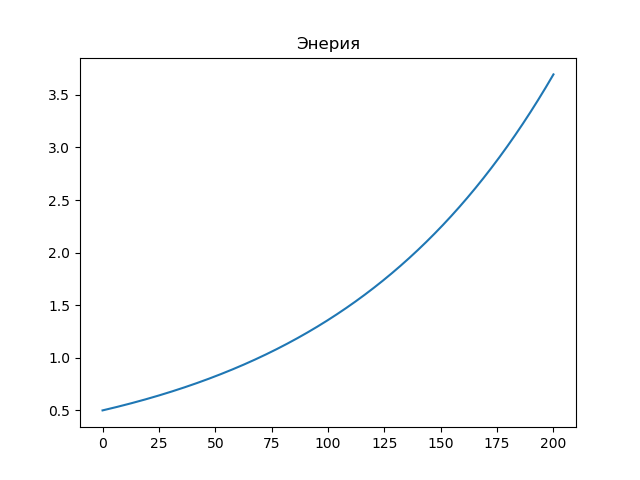

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


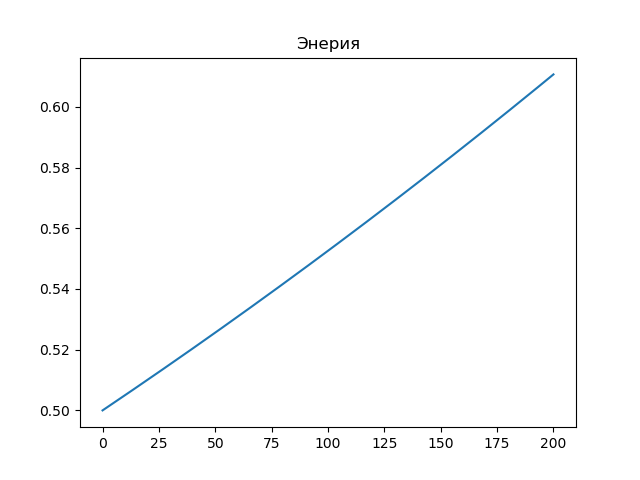

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


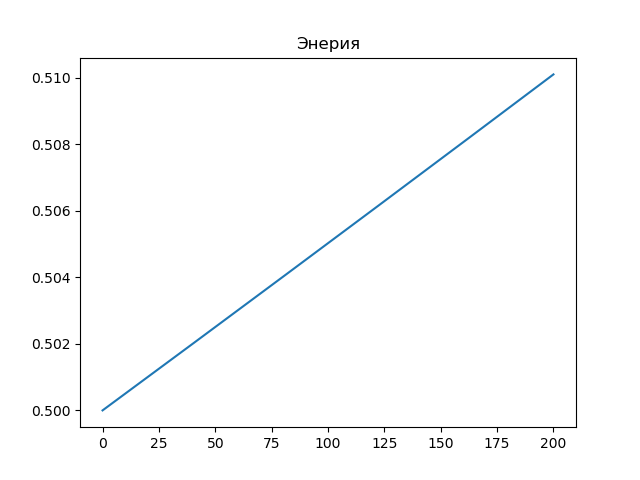

In [145]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0, 1])
tau = [0.01,0.001,0.0001]
for i in tau:
        t, u = euler_solve_dim(A, u0, T = 200, dt=i)
        plt.figure()
        plt.plot(t,0.5*u[1]**2 + 0.5*(w**2)*u[0]**2)
        plt.title(r'Энерия')  
        plt.show()

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

Мне, если честно, сложно под утро было сообразить, как написать РК2 с нуля, поэтому я провел такие рассуждения, которые мне кажутся, вроде, как логичными:
$x_{n+1} = x_n + h \cdot \dfrac{f(x_n,t_n)+f(x_{n+1},t_{n+1})}{2} \Longrightarrow 
x_{n+1} = \dfrac{x_n+x_n}{2} + h \cdot \dfrac{f(x_n,t_n)+f(x_{n+1},t_{n+1})}{2} \Longrightarrow$

$x_{n+1} = \dfrac{x_n + f(x_n,t_n)}{2} + \dfrac{x_n+f(x_{n+1},t_{n+1})}{2}$

Мне показалось, что проведя такие операции, можно сделать вывод, что можно на каждом шаге брать "половину" от явного метода Эйлера и неявного. Поэтому я просто в этот код вставил то, что было ранее и все.

In [119]:
def RK2(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((u0.shape[0], num_steps+1))
    y[:,0] = u0
    B = np.eye(u0.shape[0]) - A*dt
    for k in range(num_steps):
        y[:,k+1] = (y[:,k] + dt*A@y[:,k])/2 #явный метод с весом 1/2
        y[:,k+1] += (np.linalg.solve(B, y[:, k]))/2 #неявный метод с весом 1/2
    return tt , y

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


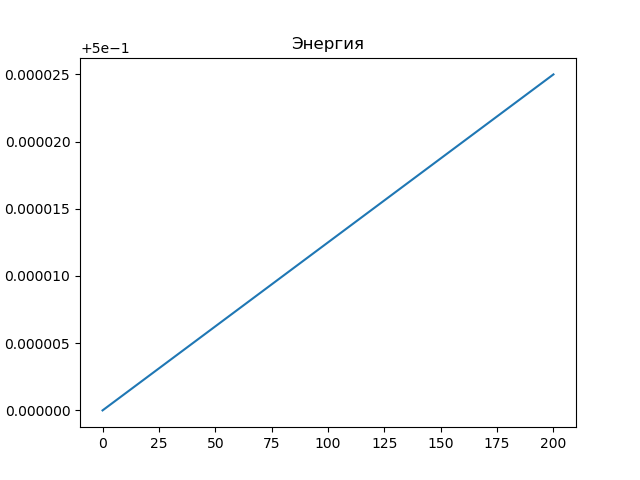

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


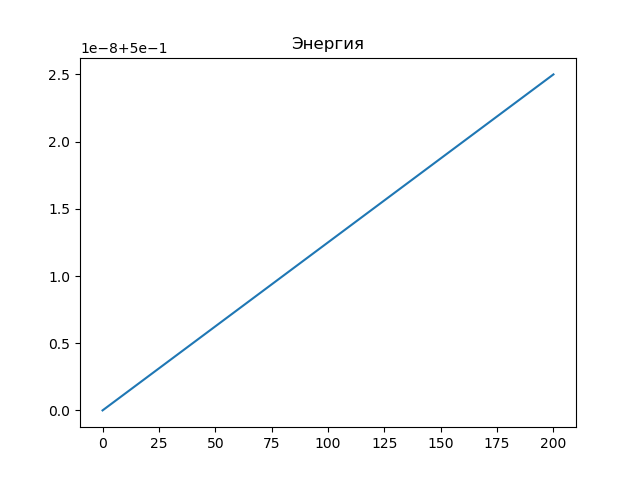

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


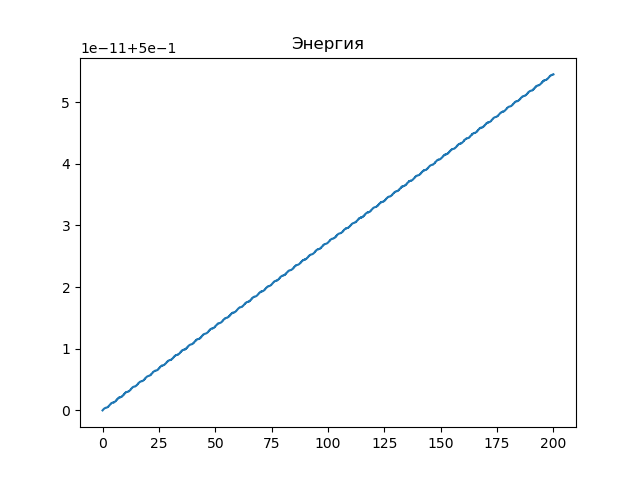

In [147]:
w=1
A = np.array([[0, -w ** 2], [1, 0]])
u0 = np.array([0., 1.])
tau = [0.01,0.001,0.0001]
for i in tau:
        t, u = RK2(A, u0, T = 200, dt=i)
        plt.figure()
        plt.plot(t,0.5*u[1]**2 + 0.5*(w**2)*u[0]**2)
        plt.title(r'Энергия')  
        plt.show()

1)Скажу по поводу выбора $\omega$. Я не стал рассматривать разные омеги, так как в первой части дз мы убедились, что в зависимости от величины ее надо подбирать шаг. А в этой части нас больше интересовала относительная точность между методами, так что тут, как мне кажется, можно проигнорировать тестирование при разных $\omega$. 
1.1)Как мне еще кажется, что $\omega$ тут - это частота по своему физическому смыслу. И в зависимости от того, какой мы ее берем, большой или маленькой, то нам надо также тогда и подстраивать Т, чтобы по масштабу было хоть что-то видно. Согласитесь, что нет смылса рассматривать один период, даже в задании у нас про это сказано)

2)Судя по мастшабам графиком энергий можно смело сделать вывод, что РК2 работает куда лучше, чем Эйлер. Так как разница очень впечатляющая. Как и следовало ожидать, тут мы не получили ЗСЭ, так как график какой-никакой, но все - таки возрастающий. Но мне кажется, что такой способ все равно имеет право на жизнь в каких-то отдельных экспериментах, в которых можно будет настроить ту точность, которая нужна будет. И также от того, какой промежуток времени рассматривается. Так как я вот взял Т=200, и даже на Эйлере во втором тесте уже не сильно заметно, как амплитуда увеличвается. А если бы я рассмотрел еще меньший промежуток, то вообще было бы сложно сказать, меняется она или нет. Так что все зависит как всегда от постановки задачи и ее требований)

3)Единственное, что смутило или нет, не знаю просто, как должно быть на самом деле. РК2 работает дольше. Может быть, я как всегда, как обычно, сделал через одно место, что у меня сложность алгоритма слишком высокая. Так что если это так, то хотелось бы получить какой-то фидбек.